## Imports Used in this Example
Below we import the necessary packages needed for this example.  Note that the `sys` module is necessary to allow us to append the system path and thus import distill.  If distill was installed on the machine directly, this would not be necessary.

In [33]:
import sys
sys.path.append('../')

import datetime
import distill
import json
import pandas as pd
import matplotlib.pyplot as plt

### Processing the JSON File

The `filtered_setup` function is used to convert a JSON file into a dictionary.  It also allows us to assert the date format that we want to use for our analysis (i.e., integer or datetime). This function also filters out all logs that are not `raw` `clicks`

In [34]:
def filtered_setup(file, date_type):

    with open(file) as json_file:
            raw_data = json.load(json_file)

    # filter
    filtered_data = []        

    for log in raw_data:
        if log['logType'] == 'raw':
            if log['type'] == 'click':
                filtered_data.append(log)
    data = {}
    for log in filtered_data:
            # UUID = sessionID + clientTime + logType + type
            data[distill.getUUID(log)] = log

    for uid in data:
        # get the log
        log = data[uid]
        # get log's clientTime
        client_time = log['clientTime']
        # convert the log's datetime
        if date_type == "integer":
            log['clientTime'] = distill.epoch_to_datetime(client_time)
        elif date_type == "datetime":
            log['clientTime'] = pd.to_datetime(client_time, unit='ms', origin='unix')

    # Sort data based off clientTime, return dict
    sorted_data = sorted(data.items(), key=lambda kv: kv[1]['clientTime'])
    sorted_dict = dict(sorted_data)

    return sorted_dict    

### Generating the Scatter Plot
The `click_plot` function inputs `sorted_dict` and returns a scatter plot that represents all clicks on a screen.


In [35]:
def click_plot(sorted_dict):
    xy_values = []
    res_values = []
    
    for key, value in sorted_dict.items():
        if "location" in value:
            if "x" in value["location"] and "y" in value["location"]:
                xy_values.append((value["location"]["x"], value["location"]["y"]))
            if "width" in value["scrnRes"] and "height" in value["scrnRes"]:
                if (value["scrnRes"]["width"], value["scrnRes"]["height"]) not in res_values:
                    res_values.append((value["scrnRes"]["width"], value["scrnRes"]["height"]))
    
    x = [x[0] for x in xy_values]
    y = [y[1] for y in xy_values]
    x_range, y_range = res_values[0]
    
    plt.scatter(x, y, color='red')
    plt.xlim(0, x_range)
    plt.ylim(0, y_range)
    plt.xlabel('Screen Width ({})'.format(x_range))
    plt.ylabel('Screen Height ({})'.format(y_range))
    plt.show()

### Testing with a sample log

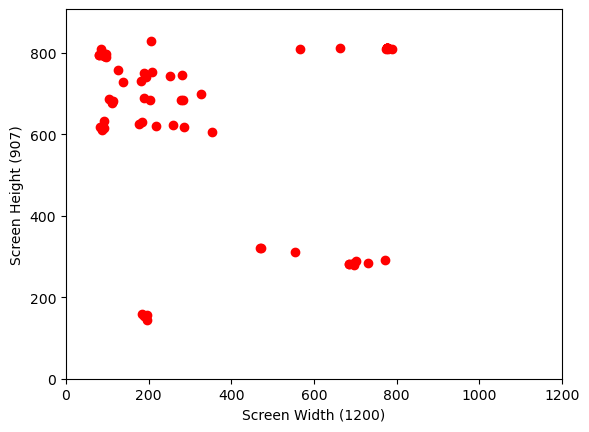

In [37]:
data_many_session = filtered_setup("./data/task_example.json", "datetime")
sorted_dict = data_many_session

click_plot(sorted_dict)